In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
smcl_data = pd.read_csv("SMCL_ANF_Items.csv")
smcl_data.head()

/Users/hugogarcia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LOCATION,BRANCH,MATERIAL,BARCODE,RECORD #(ITEM),CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),I TYPE,MAT TYPE,...,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,OTHER CALL,245|a,100|a,008 Date One
0,1vanf,1v,anf,3.904100e+13,i10000471,7/18/2005 8:45,b10000203,7/18/2005 8:45,10,a,...,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE MAMMAL,"599 E 1998;""NATURE MAMMAL""",Encyclopedia of mammals /,NaN,1998
1,1zanf,1z,anf,3.904100e+13,i10001098,7/18/2005 8:45,b10000276,7/18/2005 8:45,10,a,...,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE MARINE,597 E 1998,Encyclopedia of fishes /,NaN,1998
2,1fanf,1f,anf,3.904100e+13,i10001475,7/18/2005 8:45,b1000032x,7/18/2005 8:45,10,a,...,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE BIRD,598.2 E 1998,Encyclopedia of birds /,NaN,1998
3,1manf,1m,anf,3.904100e+13,i10001517,7/18/2005 8:45,b1000032x,7/18/2005 8:45,10,a,...,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE BIRD,598.2 E 1998,Encyclopedia of birds /,NaN,1998
4,1eanf,1e,anf,3.904100e+13,i10010816,7/18/2005 8:47,b10002364,7/18/2005 8:47,10,a,...,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING INTL,641.5972 G,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [17]:
#Renamed the columns for column V, W, X

smcl_data2 = smcl_data.rename(columns={'245|a': 'Book Title','100|a': 'Author',
                                      '008 Date One': 'Published Date'})

#dropped columns

smcl_data_clean = smcl_data2.drop(['LOCATION', 'BARCODE', 'RECORD #(ITEM)',
                 'I TYPE', 'MAT TYPE', 'OTHER CALL', 'MATERIAL'], axis=1)

#created dictionary for the BRANCH column and replaced with actual location

branch_dict = {'0k': 'Bookmobile', '1a':'Atherton', '1b':'Belmont', '1r':'Brisbane','1e':'East Palo Alto','1f':'Foster City'
,'1h':'Half Moon Bay','1m':'Millbrae','1p':'Pacifica Sharp Park','1z':'Pacifica Sanchez','1s':'San Carlos','1v':'Portola Valley','1w':'Woodside'}

#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)

smcl_data_clean = smcl_data_clean.replace({"BRANCH": branch_dict})

In [18]:
#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)
smcl_data_clean.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [19]:
#Looking to see which roll to remove
smcl_data_clean["CALL #"].value_counts()

BIO        6789
COOKING    5231
HISTORY    4966
HEALTH     4575
TRAVEL     4540
           ... 
929.4         1
TRIBES        1
F-JOH         1
F-STR         1
F-HIG         1
Name: CALL #, Length: 254, dtype: int64

In [20]:
#Removing items starting with "F-"
smcl_data_removed1 = smcl_data_clean[~smcl_data_clean["CALL #"].astype(str).str.startswith('F-')]
#Removing items starting with "M-"
smcl_data_removed2 = smcl_data_removed1[~smcl_data_removed1["CALL #"].astype(str).str.startswith('M-')]
#Removing items starting with "SF-"
smcl_data_removed3 = smcl_data_removed2[~smcl_data_removed2["CALL #"].astype(str).str.startswith('SF-')]
#Removing items starting with "YA-"
smcl_data_removed4 = smcl_data_removed3[~smcl_data_removed3["CALL #"].astype(str).str.startswith('YA-')]

#Removing items that appear less than 10 times
smcl_data_removed5 = smcl_data_removed4.groupby('CALL #').filter(lambda d: len(d) > 10)

#Removing items that are incorrectly placed into ANF
smcl_data_removed6 = smcl_data_removed5[smcl_data_removed5["CALL #"] != "USB"]
smcl_data_removed7 = smcl_data_removed6[smcl_data_removed6["CALL #"] != "SP"]
smcl_data_removed8 = smcl_data_removed7[smcl_data_removed7["CALL #"] != "CHI"]
smcl_data_removed9 = smcl_data_removed8[smcl_data_removed8["CALL #"] != "J"]
smcl_data_removed10 = smcl_data_removed9[smcl_data_removed9["CALL #"] != "DVD"]
smcl_data_removed11 = smcl_data_removed10[smcl_data_removed10["CALL #"] != "CD"]

In [21]:
#Combining Call # that are the same
smcl_data_removed_final = smcl_data_removed11.replace({
                                                        "SOC": "SOC SCI",
                                                        "PERS": "PERS FIN", "PER": "PERS FIN",
                                                        "SPORTS": "SPORT",
                                                        "LANG": "LANG INST",
                                                        "CRAFTS": "CRAFT",
                                                        "PETS": "PET",
                                                        "SELF": "SELFHELP",
                                                        "LITERATUR": "LIT",
                                                        "PHILOSOPH": "PHILSOPH",
                                                        })

smcl_data_removed_final

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70785,Half Moon Bay,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70786,Millbrae,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70787,San Carlos,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020
70788,East Palo Alto,3/16/2020 10:47,b2849555x,11/12/2019 14:54,0,0,0,0,0,t,- -,- -,- -,ART,Blender /,"Van Gumster, Jason,",2020


In [22]:
TOT_CIRC = smcl_data_removed_final["TOT CHKOUT"] + smcl_data_removed_final["TOT RENEW"]
smcl_data_removed_final["TOT CIRC"] =  TOT_CIRC

smcl_data_df = smcl_data_removed_final[["BRANCH", "Book Title", "Author", "Published Date", "CALL #", "TOT CHKOUT", "TOT RENEW", "TOT CIRC", "STATUS", "DUE DATE", "LOUTDATE", "LCHKIN", "CREATED(ITEM)"]]

smcl_data_df.head()

,BRANCH,Book Title,Author,Published Date,CALL #,TOT CHKOUT,TOT RENEW,TOT CIRC,STATUS,DUE DATE,LOUTDATE,LCHKIN,CREATED(ITEM)
0,Portola Valley,Encyclopedia of mammals /,NaN,1998,NATURE,15,6,21,m,- -,4/28/2016 15:35,5/24/2016 11:00,7/18/2005 8:45
1,Pacifica Sanchez,Encyclopedia of fishes /,NaN,1998,NATURE,30,11,41,-,- -,4/18/2018 17:17,5/14/2018 10:40,7/18/2005 8:45
2,Foster City,Encyclopedia of birds /,NaN,1998,NATURE,40,23,63,-,- -,11/24/2019 16:41,1/10/2020 10:47,7/18/2005 8:45
3,Millbrae,Encyclopedia of birds /,NaN,1998,NATURE,17,9,26,-,- -,7/12/2018 15:36,7/14/2018 11:13,7/18/2005 8:45
4,East Palo Alto,Caribbean and African cooking /,"Grant, Rosamund.",1998,COOKING,8,8,16,m,- -,6/8/2016 16:57,8/17/2016 17:01,7/18/2005 8:47


In [23]:
smcl_grouped = smcl_data_df.groupby(['BRANCH', 'CALL #'],as_index = True)
smcl_grouped.sum()

#smcl_data_df['BRANCH'].groupby(smcl_data_df['TOT CIRC']).value)counts(normalize=True)


TOT CHKOUT  TOT RENEW  TOT CIRC
BRANCH   CALL #                                   
Atherton ART               58         71       129
         BIO             2498       1659      4157
         BUSINESS         835       1144      1979
         COLLECT            8         15        23
         COMPUTE          232        560       792
...                       ...        ...       ...
Woodside SPORT            475        427       902
         TECH              22         32        54
         TRANSPRT          32         31        63
         TRAVEL          2041       1983      4024
         TRIBE             75         45       120

[470 rows x 3 columns]

In [163]:
smcl_crosstable = smcl_data_df.pivot_table(values="TOT CIRC", index=["BRANCH"], columns="CALL #", aggfunc='mean')

#combine = smcl_crosstable.rename(columns = {"BIO": "ART"}, inplace =True)

smcl_crosstable.round(2)

#smcl_crosstable['TRAVEL_TRANSPRT']=smcl_crosstable['TRAVEL'] + smcl_crosstable['TRANSPRT']
#smcl_crosstable.head()

CALL #,ART,BIO,BUSINESS,COLLECT,COMPUTE,CONSUMER,COOKING,CRAFT,EDUCATE,FARMING,...,RELIGION,SCIENCE,SELFHELP,SOC SCI,SPIRIT,SPORT,TECH,TRANSPRT,TRAVEL,TRIBE
BRANCH,,,,,,,,,,,,,,,,,,,,,
Atherton,16.12,19.33,24.43,4.60,33.00,NaN,35.05,29.25,19.44,NaN,...,28.22,19.26,35.64,17.00,36.81,20.75,17.50,NaN,19.04,NaN
Belmont,35.56,17.40,35.37,7.60,38.33,19.00,43.18,37.98,27.46,43.13,...,27.90,26.61,35.76,18.25,31.39,24.87,33.83,22.27,26.80,19.25
Bookmobile,19.00,8.29,14.33,NaN,NaN,NaN,32.00,1.00,0.00,NaN,...,NaN,NaN,4.00,14.00,NaN,NaN,NaN,NaN,10.00,NaN
Brisbane,20.86,12.32,16.51,8.33,20.62,17.40,25.65,30.53,12.50,15.50,...,24.12,17.67,25.73,12.85,16.73,14.91,7.25,8.20,9.82,9.50
East Palo Alto,14.14,9.87,14.34,2.40,5.10,0.00,23.74,23.78,10.09,11.00,...,12.44,14.80,17.87,10.66,15.96,8.76,25.14,21.67,4.58,0.00
Foster City,38.61,21.01,35.54,10.26,47.39,18.88,48.65,44.54,31.03,31.37,...,29.28,30.89,38.06,21.61,35.44,25.85,38.39,16.98,24.49,12.54
Half Moon Bay,25.62,15.42,20.95,7.54,20.96,0.00,40.82,31.98,12.14,30.06,...,18.29,22.85,26.25,14.62,26.79,16.68,20.03,22.05,15.14,23.00
Millbrae,30.71,18.07,27.42,9.62,28.12,0.00,42.13,35.50,23.00,27.85,...,23.56,21.93,31.67,18.17,26.85,20.23,29.78,11.77,17.28,19.12
Pacifica Sanchez,30.09,19.22,22.12,7.04,29.41,10.75,40.05,32.41,14.31,32.19,...,26.85,23.24,27.83,15.38,31.71,21.27,20.50,21.20,18.60,20.44


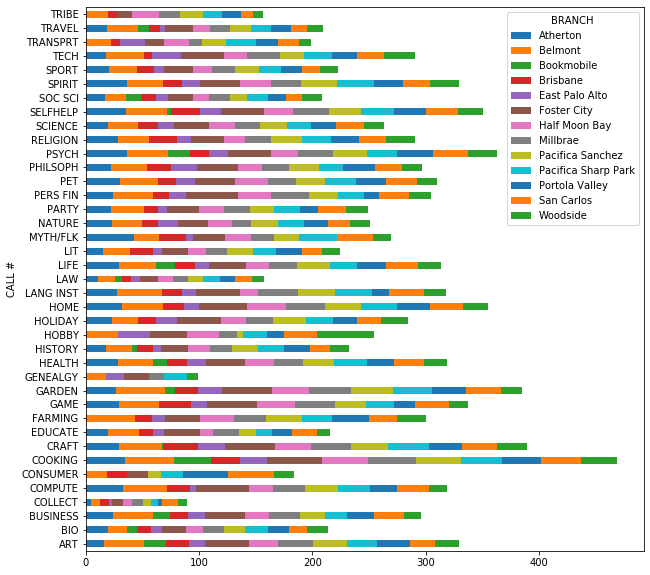

In [164]:
#horizontal_bar_plot = smcl_crosstable.plot.barh()
horizontal_bar_plot = smcl_crosstable.T.plot(kind='barh', stacked=True, figsize=[10,10])

